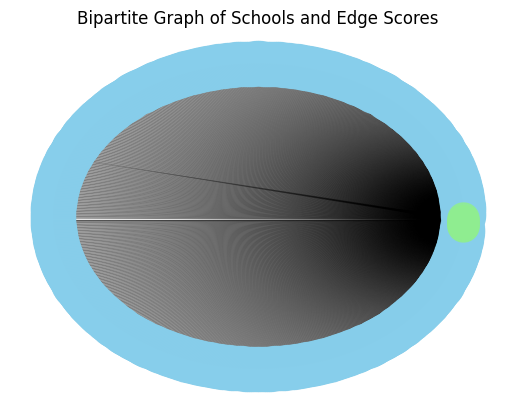

In [11]:
# Read CSV file
file_path = 'Chicago_Public_Schools_-_Progress_Report_Cards__2011-2012__20240416.csv'

Sorted Zip Codes:
60605
60607
60608
60609
60610
60612
60613
60614
60615
60616
60617
60618
60619
60620
60621
60622
60623
60624
60625
60626
60627
60628
60629
60630
60631
60632
60633
60634
60636
60637
60638
60639
60640
60641
60642
60643
60644
60645
60646
60647
60649
60651
60652
60653
60655
60656
60657
60659
60660
60707
60827


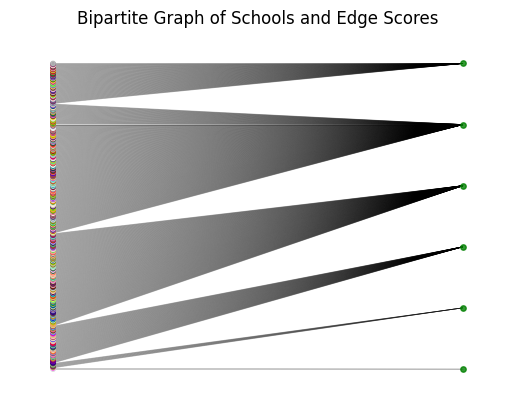

<Figure size 5e+06x5e+06 with 0 Axes>

In [17]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Read CSV file
file_path = 'Chicago_Public_Schools_-_Progress_Report_Cards__2011-2012__20240416.csv'
df = pd.read_csv(file_path)

# Extract unique school names
schools = df['Name of School'].unique().tolist()

# Extract unique zip codes
zip_codes = df['ZIP Code'].unique().tolist()

# Sort the zip codes
sorted_zip_codes = sorted(zip_codes)

# Print the sorted zip codes
print("Sorted Zip Codes:")
for zip_code in sorted_zip_codes:
    print(zip_code)

zip_code_colors = {
    60605: 'red',
    60607: 'blue',
    60608: 'green',
    60609: 'orange',
    60610: 'yellow',
    60612: 'purple',
    60613: 'cyan',
    60614: 'magenta',
    60615: 'lime',
    60616: 'pink',
    60617: 'teal',
    60618: 'olive',
    60619: 'brown',
    60620: 'navy',
    60621: 'maroon',
    60622: 'gold',
    60623: 'silver',
    60624: 'crimson',
    60625: 'indigo',
    60626: 'turquoise',
    60627: 'violet',
    60628: 'azure',
    60629: 'lavender',
    60630: 'orchid',
    60631: 'coral',
    60632: 'salmon',
    60633: 'skyblue',
    60634: 'khaki',
    60636: 'tan',
    60637: 'ivory',
    60638: 'plum',
    60639: 'beige',
    60640: 'chartreuse',
    60641: 'thistle',
    60642: 'peru',
    60643: 'darkcyan',
    60644: 'deeppink',
    60645: 'firebrick',
    60646: 'dodgerblue',
    60647: 'darkorange',
    60649: 'darkslategray',
    60651: 'darkseagreen',
    60652: 'darkviolet',
    60653: 'crimson',
    60655: 'cyan',
    60656: 'darkkhaki',
    60657: 'darkolivegreen',
    60659: 'darkslateblue',
    60660: 'darkorchid',
    60707: 'darkturquoise',
    60827: 'darkred'
}

# Create a bipartite graph
B = nx.Graph()

# Add school nodes
B.add_nodes_from(schools, bipartite='school')

# Map school names to 'Edge Score' and add edges to the graph
school_edge_scores = df.set_index('Name of School')['Edge Score'].to_dict()

for school, edge_score in school_edge_scores.items():
    B.add_edge(school, edge_score, weight=edge_score)
    B.nodes[edge_score]['bipartite'] = 'edge_score'


# Draw the bipartite graph with standard layout
pos = nx.bipartite_layout(B, schools, scale=500)

# Separate schools and edge scores
school_nodes = [node for node, data in B.nodes(data=True) if data['bipartite'] == 'school']
edge_score_nodes = [node for node, data in B.nodes(data=True) if data['bipartite'] == 'edge_score']

# Modify node color assignment
node_colors = [zip_code_colors.get(df[df['Name of School'] == school]['ZIP Code'].iloc[0], 'gray') for school in schools]

# ###
# # Sort the school nodes based on their zip codes
# sorted_school_nodes = sorted(school_nodes, key=lambda x: df[df['Name of School'] == x]['ZIP Code'].iloc[0])

# # Sort the edge score nodes based on their values
# sorted_edge_score_nodes = sorted(edge_score_nodes, key=lambda x: school_edge_scores[x])

# # Combine the sorted nodes
# sorted_nodes = sorted_school_nodes + sorted_edge_score_nodes

# # Draw the bipartite graph with custom layout considering sorted nodes
# pos = {}

# # Place sorted nodes on the left and right sides with increased spacing
# school_y_positions = np.linspace(0, 1, len(sorted_school_nodes))
# pos.update((node, (0, y)) for node, y in zip(sorted_school_nodes, school_y_positions))

# edge_score_y_positions = np.linspace(0, 1, len(sorted_edge_score_nodes))
# pos.update((node, (1, y)) for node, y in zip(sorted_edge_score_nodes, edge_score_y_positions))

###
# Draw the bipartite graph with custom layout for school nodes
pos = {}

# Place school nodes on the left side with increased spacing
school_y_positions = np.linspace(0, 1, len(school_nodes))
pos.update((node, (0, y)) for node, y in zip(school_nodes, school_y_positions))

# Place edge score nodes on the right side with normal spacing
edge_score_y_positions = np.linspace(0, 1, len(edge_score_nodes))
pos.update((node, (1, y)) for node, y in zip(edge_score_nodes, edge_score_y_positions))


# Draw nodes
nx.draw_networkx_nodes(B, pos, nodelist=school_nodes, node_color=node_colors, node_size=10, alpha=0.8)


# Draw nodes
#nx.draw_networkx_nodes(B, pos, nodelist=school_nodes, node_color='mediumblue', node_size=10, alpha=0.8)
nx.draw_networkx_nodes(B, pos, nodelist=edge_score_nodes, node_color='green', node_size=15, alpha=0.8)

# Draw edges
nx.draw_networkx_edges(B, pos, width=0.5, alpha=0.3, edge_color='black')

# Set plot title and display the graph
plt.title('Bipartite Graph of Schools and Edge Scores')
plt.axis('off')
plt.figure(figsize=(50000, 50000))
plt.show()


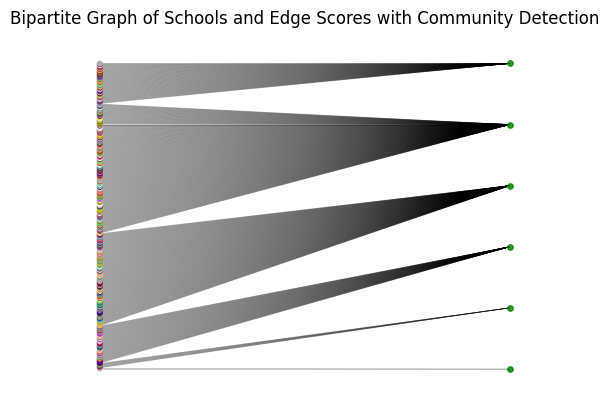

In [10]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

# Read CSV file
file_path = 'Chicago_Public_Schools_-_Progress_Report_Cards__2011-2012__20240416.csv'
df = pd.read_csv(file_path)

# Extract unique school names
schools = df['Name of School'].unique().tolist()

# Extract unique zip codes
zip_codes = df['ZIP Code'].unique().tolist()

# Create a bipartite graph
B = nx.Graph()

# Add school nodes and group them into communities based on zip codes
zip_code_communities = defaultdict(list)
for school, zip_code in zip(df['Name of School'], df['ZIP Code']):
    B.add_node(school, bipartite='school', zip_code=zip_code)
    zip_code_communities[zip_code].append(school)

communities = list(zip_code_communities.values())

# Create a mapping of school to community
school_community_mapping = {}
for idx, community in enumerate(communities):
    for school in community:
        school_community_mapping[school] = idx

# Create a dictionary mapping zip codes to colors
zip_code_colors = {
    60605: 'red',
    60607: 'blue',
    60608: 'green',
    60609: 'orange',
    60610: 'yellow',
    60612: 'purple',
    60613: 'cyan',
    60614: 'magenta',
    60615: 'lime',
    60616: 'pink',
    60617: 'teal',
    60618: 'olive',
    60619: 'brown',
    60620: 'navy',
    60621: 'maroon',
    60622: 'gold',
    60623: 'silver',
    60624: 'crimson',
    60625: 'indigo',
    60626: 'turquoise',
    60627: 'violet',
    60628: 'azure',
    60629: 'lavender',
    60630: 'orchid',
    60631: 'coral',
    60632: 'salmon',
    60633: 'skyblue',
    60634: 'khaki',
    60636: 'tan',
    60637: 'ivory',
    60638: 'plum',
    60639: 'beige',
    60640: 'chartreuse',
    60641: 'thistle',
    60642: 'peru',
    60643: 'darkcyan',
    60644: 'deeppink',
    60645: 'firebrick',
    60646: 'dodgerblue',
    60647: 'darkorange',
    60649: 'darkslategray',
    60651: 'darkseagreen',
    60652: 'darkviolet',
    60653: 'crimson',
    60655: 'cyan',
    60656: 'darkkhaki',
    60657: 'darkolivegreen',
    60659: 'darkslateblue',
    60660: 'darkorchid',
    60707: 'darkturquoise',
    60827: 'darkred'
}

# Assign community colors based on zip codes
community_colors = [zip_code_colors.get(B.nodes[community[0]]['zip_code'], 'turquoise') for community in communities]

# Add 'Edge Score' nodes and edges to the bipartite graph
df['Edge Score'] = pd.to_numeric(df['Edge Score'], errors='coerce')
school_edge_scores = df.set_index('Name of School')['Edge Score'].to_dict()
for school, edge_score in school_edge_scores.items():
    if not pd.isna(edge_score):
        B.add_node(edge_score, bipartite='edge_score')
        B.add_edge(school, edge_score, weight=edge_score)

# Draw nodes with colors based on communities
node_colors = [community_colors[school_community_mapping[school]] for school in schools]

# Draw the bipartite graph with custom layout for school nodes
pos = {}
school_y_positions = np.linspace(0, 1, len(schools))
pos.update((node, (0, y)) for node, y in zip(schools, school_y_positions))

# Place edge score nodes on the right side with normal spacing
edge_score_nodes = [node for node, data in B.nodes(data=True) if data['bipartite'] == 'edge_score']
edge_score_y_positions = np.linspace(0, 1, len(edge_score_nodes))
pos.update((node, (1, y)) for node, y in zip(edge_score_nodes, edge_score_y_positions))

# Draw nodes
nx.draw_networkx_nodes(B, pos, nodelist=schools, node_color=node_colors, node_size=10, alpha=0.8)
nx.draw_networkx_nodes(B, pos, nodelist=edge_score_nodes, node_color='green', node_size=15, alpha=0.8)

# Draw edges
nx.draw_networkx_edges(B, pos, width=0.5, alpha=0.3, edge_color='black')

# Set plot title and display the graph
plt.title('Bipartite Graph of Schools and Edge Scores with Community Detection')
plt.axis('off')
plt.show()

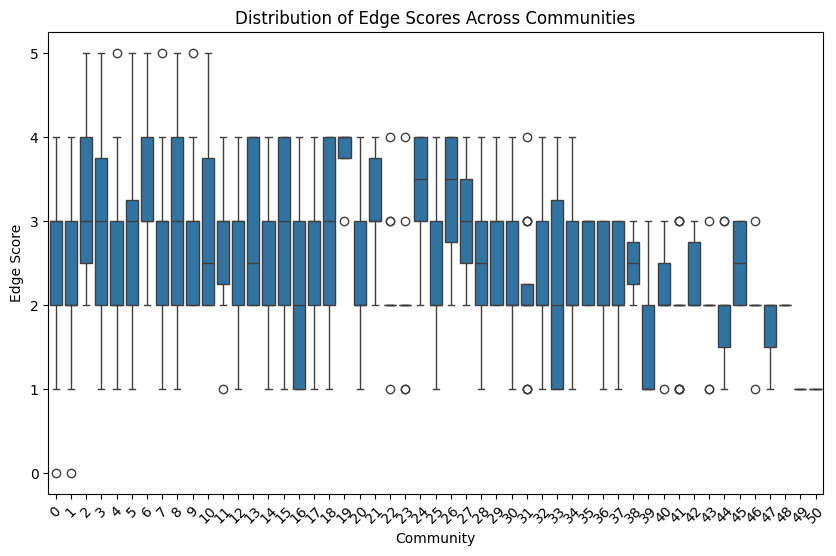

In [13]:
import seaborn as sns

# Create a DataFrame to store edge scores and their corresponding community
edge_score_data = []
for school, edge_score in school_edge_scores.items():
    if not pd.isna(edge_score):
        community = school_community_mapping[school]
        edge_score_data.append({'School': school, 'Edge Score': edge_score, 'Community': community})

edge_score_df = pd.DataFrame(edge_score_data)

# Plot boxplot of edge scores for each community
plt.figure(figsize=(10, 6))
sns.boxplot(x='Community', y='Edge Score', data=edge_score_df)
plt.title('Distribution of Edge Scores Across Communities')
plt.xlabel('Community')
plt.ylabel('Edge Score')
plt.xticks(rotation=45)
plt.show()


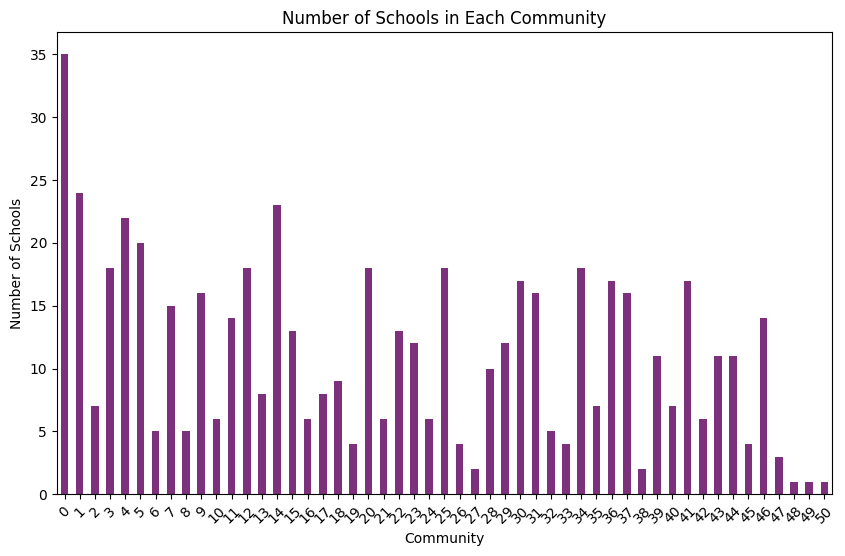

In [17]:
# Count the number of schools in each community
school_count_per_community = edge_score_df['Community'].value_counts().sort_index()

# Plot bar chart of school count per community
plt.figure(figsize=(10, 6))
color_dark_lavender = (125/255, 49/255, 125/255)  # RGB values (R, G, B) scaled to [0, 1]
school_count_per_community.plot(kind='bar', color=color_dark_lavender)
plt.title('Number of Schools in Each Community')
plt.xlabel('Community')
plt.ylabel('Number of Schools')
plt.xticks(rotation=45)
plt.show()


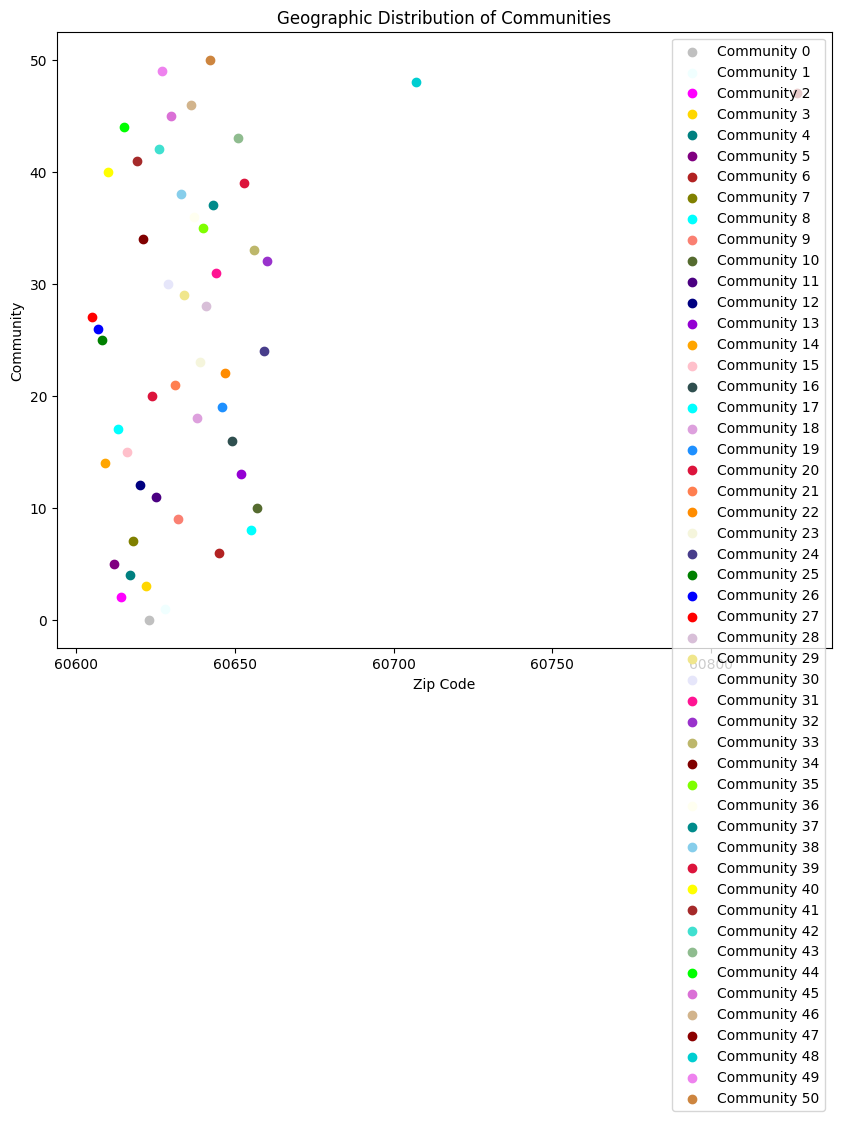

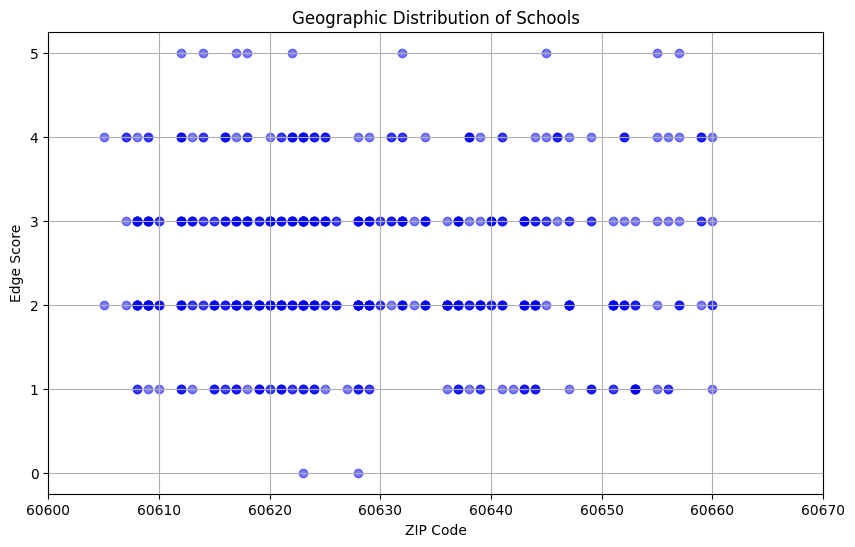

In [20]:
# Plot communities on a map using zip code centroids
plt.figure(figsize=(10, 8))
for idx, community in enumerate(communities):
    zip_code = B.nodes[community[0]]['zip_code']
    color = zip_code_colors.get(zip_code, 'turquoise')
    plt.scatter(zip_code, idx, color=color, label=f'Community {idx}')
plt.title('Geographic Distribution of Communities')
plt.xlabel('Zip Code')
plt.ylabel('Community')
plt.legend()
plt.show()

# Extract zip codes and edge scores
zip_codes = df['ZIP Code'].tolist()
edge_scores = pd.to_numeric(df['Edge Score'], errors='coerce').dropna()

# Plot the geographic distribution with specified x-axis range
plt.figure(figsize=(10, 6))
plt.scatter(zip_codes, edge_scores, color='blue', alpha=0.5)
plt.title('Geographic Distribution of Schools')
plt.xlabel('ZIP Code')
plt.ylabel('Edge Score')
plt.xlim(60600, 60670)  # Set x-axis range
plt.grid(True)
plt.show()
